## How to leverage the effect of Taylor Swift Impact on the economy - an Airbnb host perspective


### Introduction to the question:

*Taylor Swift (TS henceforth) has become so successful that she has begun to have a noticeable effect on the national economy.
Her mere presence at football games have increased sales and buzz around the NFL, an already massive business.*

**Question:** How can a business or individual leverage the economic effects of Taylor Swift to benefit them?

---
### Abstract

There are many studies that show the impact that TS has had on the economy thanks to her concerts.
However, very few quantify how much can individual benefit from her attendance to a given city.
This study aims to fill that gap by quantifying how much can an Airbnb host increase the price of the listing during TS concert dates.

For this analysis I focus primarily on Los Angeles 2023 concert data and analyse different variables before reaching a conclusion on the average price increase.

#### Data collection:
* The primary source of **data** for this analysis is the airbnb listings data in Los Angeles which can be accessed through this link: http://insideairbnb.com/get-the-data/
*  This data was last updated in september 2023 which makes it relevant for our study given that the TS concert dates in LA are: 3,4,5,8,9 of August 2023 and we are interested in analysing the change before those dates


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Airbnb data - listings and calendar
airbnb_data = pd.read_csv('listings.csv')
airbnb_data.sample(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
6251,752222476907770482,Condo in Los Angeles · 1 bedroom · 2 beds · 1 ...,480739019,Henry,City of Los Angeles,Downtown,34.05035,-118.25035,Entire home/apt,338,30,0,NaN,NaN,3,365,0,NaN
28041,34341631,Hotel in Inglewood · ★3.89 · 1 bedroom · 1 bed...,62000521,Darshan,Other Cities,Inglewood,33.93056,-118.33538,Private room,100,1,28,2023-08-28,0.54,5,362,12,Exempt


#### Data cleaning:

The first step of the analysis is to clean the data and filter it for our analysis

* ***First***, we extract the data only for the listings in the city of los angels (close to the stadium where TS did her concert)
  - dataframe = [`la_listings`]
* ***Second*** I will divide the data into 2 dataframes:
  * `baseline_listings` - to establish a **baseline** of the trends in airbnb bookings
  * `concert_listings` - to filter only for **the dates of the concerts** to then compare how the different variables change during TS stay.
---

* *Note on the technique used*: the `last_review` column is used as a proxy for the date of stay. Only the listings which have as a `last_review_date` a date that coincides with the night that TS had a concert, will be considered in the second data set
  * With the current availability of data (due to privacy reasons) this is the closest aproximation that can be done to find an occupancy rate
  * Moreover, it is reasonalble to assume that the last review can coincide with the concert one becuase the dataset collects data only for 15 days after the end of the concert

In [ ]:
# Filter for Los Angeles listings

# 1) Only in Los Angeles City
la_listings = airbnb_data[airbnb_data['neighbourhood_group'] == 'City of Los Angeles']


# 2) Establish dates to get a baseline average -- all dates until agust to establish average

la_listings['last_review'] = pd.to_datetime(la_listings['last_review']) # Convert 'last_review' column to datetime

base_start_date = pd.Timestamp('2023-05-01')
base_end_date = pd.Timestamp('2023-07-31')
baseline_listings = la_listings[(la_listings['last_review'] >= base_start_date) &
                                (la_listings['last_review'] <= base_end_date)]

# 3) Now filter the dataset for those listings that have as last review date a date that coincides with the nights that ts did her concert in LA - this will be a proxy for occupnacy during her concert
concert_dates = ['2023-08-03', '2023-08-04', '2023-08-05', '2023-08-08', '2023-08-09']
concert_listings = la_listings[la_listings['last_review'].isin(concert_dates)]

la_listings

### **Exploratory analysis:**

* We observe that in the baseline dataframe we have 2869 rows while in the concert one there are 439 rows
* This is expected given that the 439 rows are only for those apartments that got a review for a stay that coincided with TS concert


In [206]:
print(baseline_listings.shape)
concert_listings.shape

(2869, 18)


(439, 18)

---
#### **(1) Which type of apartments do TS fans book the most?**
* From the analysis, we can observe that **Entire home/apt** are by far the most booked type of listing during TS concert
* While the price is slightly higher, there is a clear preference for having a full apartment even if it is only for a couple of nights


In [211]:
# QUESTION: What type of houses do ts fans book the most?

most_popular_rt = concert_listings['room_type'].value_counts().reset_index()
most_popular_rt.rename(columns={'index': 'room_type', 'room_type': 'bookings_during_concert' }, inplace=True)
most_popular_rt


grouped_rt_concert = concert_listings.groupby('room_type')[['price']].mean().round(2)
poplar_merged = pd.merge(grouped_rt_concert, most_popular_rt, on='room_type')
poplar_merged_top25_rt = poplar_merged.sort_values(by='bookings_during_concert', ascending = False).head(25)
poplar_merged_top25_rt

,room_type,price,bookings_during_concert
0,Entire home/apt,294.48,372
1,Private room,136.91,64
2,Shared room,28.67,3


* Having this information **an airbnb host** already knows on the type of apartment he should look at when trying to benefit from the positive impact that TS brings to the economy

---
#### **(2) What is the most popular neighbourhood for TS fans?**

In [213]:
# GROUPING BY NEIGHBORHOOD
most_popular_ngbr = concert_listings['neighbourhood'].value_counts().reset_index()
most_popular_ngbr.rename(columns={'index': 'neighbourhood', 'neighbourhood': 'bookings_during_concert' }, inplace=True)

,neighbourhood,bookings_during_concert
0,Venice,41
1,Hollywood,27
2,Hollywood Hills,21
3,Downtown,16
4,Mid-City,14
...,...,...
70,Vermont-Slauson,1
71,Elysian Valley,1
72,Manchester Square,1
73,Reseda,1


In [214]:
# FINDING THE TOP 25 NEIGHBOURHOODS  IN TERMS OF # OF BOOKINGS
grouped_ngbr_concert = concert_listings.groupby('neighbourhood')[['number_of_reviews_ltm','price']].mean().round(2)
poplar_merged = pd.merge(grouped_ngbr_concert, most_popular_ngbr, on='neighbourhood')
poplar_merged_top25 = poplar_merged.sort_values(by='bookings_during_concert', ascending = False).head(25)
poplar_merged_top25

,neighbourhood,number_of_reviews_ltm,price,bookings_during_concert
64,Venice,9.80,304.66,41
29,Hollywood,7.22,271.85,27
30,Hollywood Hills,13.00,318.43,21
13,Downtown,16.75,194.81,16
38,Mid-City,8.14,151.86,14
54,Silver Lake,19.38,278.69,13
74,Woodland Hills,14.00,365.50,12
5,Beverly Grove,11.50,253.83,12
31,Hollywood Hills West,16.09,770.55,11
56,Studio City,11.60,432.40,10


#### **(3) Do TS fans look for luxury listings?**

* We notice that there is no strong direct relationship between the price of the listing and the number of bookings
* However, we observe that the most popular behavior is to get medium priced listings
  * **This is expected as considering the audience** of the concert, they are not business travelers, thus they are not after the most expensive listings
  * However, they still want to ensure that they are in a safe place



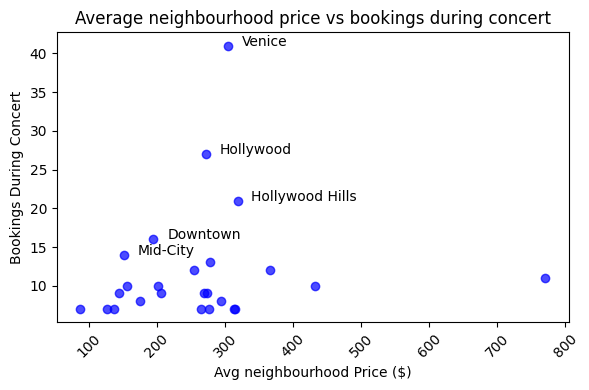

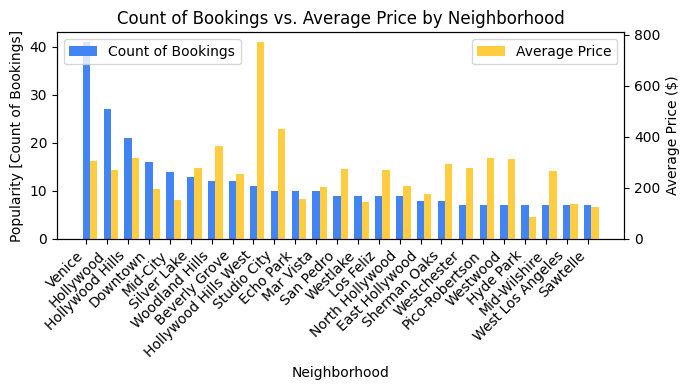

In [268]:
# SCATTERPLOT RELATIONSHIP PRICE AND BOOKINGS

price = poplar_merged_top25['price']
bookings_during_concert = poplar_merged_top25['bookings_during_concert']

plt.figure(figsize=(6, 4))
plt.scatter(price, bookings_during_concert, c='blue', alpha=0.7)
plt.title('Average neighbourhood price vs bookings during concert')
plt.xlabel('Avg neighbourhood Price ($)')
plt.ylabel('Bookings During Concert')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed

# Annotate the top 5 points with neighborhood names using iterrows()
for i, row in poplar_merged_top25.head(5).iterrows():
    plt.annotate(row['neighbourhood'], (row['price'], row['bookings_during_concert']), textcoords="offset points", xytext=(10, 0))

plt.tight_layout()
plt.show()

#------------------------------------------------------------------------------------------------------------------------

# Visualised as a barchart
# Sort the DataFrame by 'bookings_during_concert' to get the most popular neighborhoods first
poplar_merged_top25_sorted = poplar_merged_top25.sort_values(by='bookings_during_concert', ascending=False)

# Create an array of indices for the neighborhoods
indices = np.arange(len(poplar_merged_top25_sorted))

# Define the width of each bar
bar_width = 0.35

# Define custom colors (two complementary shades)
bookings_color = '#4284F3'  # Coral
price_color = '#FFCD3F'     # Green

# Create the figure and primary y-axis (for count of bookings)
fig, ax1 = plt.subplots(figsize=(7, 4))

# Create bars for count of bookings
bookings_bars = ax1.bar(indices, poplar_merged_top25_sorted['bookings_during_concert'], bar_width, label='Count of Bookings', color=bookings_color,)

# Set the x-axis labels to be the neighborhood names
ax1.set_xticks(indices)
ax1.set_xticklabels(poplar_merged_top25_sorted['neighbourhood'], rotation=45, ha='right')

# Set labels, title, and legend for the primary y-axis
ax1.set_xlabel('Neighborhood')
ax1.set_ylabel('Popularity [Count of Bookings]')
ax1.set_title('Count of Bookings vs. Average Price by Neighborhood')
ax1.legend(loc='upper left')

# Create a secondary y-axis for average price
ax2 = ax1.twinx()

# Create bars for average price
price_bars = ax2.bar(indices + bar_width, poplar_merged_top25_sorted['price'], bar_width, label='Average Price', color=price_color)

# Set labels for the secondary y-axis
ax2.set_ylabel('Average Price ($)')

# Set legend for the secondary y-axis
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


* Therefore, **as a host**, to maximise the amount of bookings during a TS concert it might be relevevant to analyse competitor prices and place yourself somewhere in the middle

#### **(4) Are higher reviews attractive for TS fans?**

* We observe that most of the bookings have around 10 to 12 reviews in the last twelve months for the apartments booked by fans
* This shows that while it is good to have accumulated reviews during the LTM period, it is not necessarily an indicator for hgiher bookings during TS stay

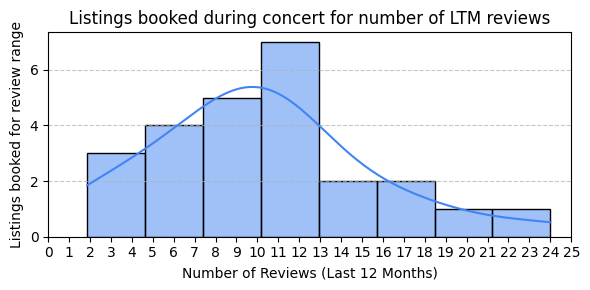

In [277]:
# Define the number of bins and the range for the number of reviews
num_bins = 8
reviews_range = (0, 25)

plt.figure(figsize=(6, 3))
sns.histplot(poplar_merged_top25['number_of_reviews_ltm'], bins=num_bins, kde=True, color='#4284F3')
plt.xlabel('Number of Reviews (Last 12 Months)')
plt.ylabel('Listings booked for review range')
plt.title('Listings booked during concert for number of LTM reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(reviews_range[0], reviews_range[1] + 1))
plt.xlim(reviews_range)
plt.tight_layout()

plt.show()
# ANSWER: - do not nevessarily look for higher reviewd appartments

### **Price analysis:**
#### **What is the average expected change in price that a host can leverage during a TS concert?**

* We observe that **on average prices are increased by 16,71%** in the neighborhoods where TS fans stay during the concert
* However, the neighborhood is not an indicator of how much the price can increase given that the top neighborhoods are not the ones displayed in the previous analysis

In [278]:
# Calculate the average price for baseline listings
baseline_average_price = baseline_listings.groupby('neighbourhood')['price'].mean().reset_index()
baseline_average_price.rename(columns={'price': 'baseline_average_price'}, inplace=True)

# Calculate the average price for concert listings
concert_average_price = concert_listings.groupby('neighbourhood')['price'].mean().reset_index()
concert_average_price.rename(columns={'price': 'concert_average_price'}, inplace=True)

# Merge the average price and bookings dataframes based on the neighborhood
price_change_df = pd.merge(baseline_average_price, concert_average_price, on='neighbourhood')


# Calculate the price change as the difference between concert average price and baseline average price
price_change_df['price_change'] = price_change_df['concert_average_price'] - price_change_df['baseline_average_price']

# Calculate the percentage price change
price_change_df['percentage_price_change'] = (price_change_df['price_change'] / price_change_df['baseline_average_price']) * 100

# Display the dataframe
price_change_df_sorted=price_change_df.sort_values(by='percentage_price_change', ascending = False)

poplar_merged2 = pd.merge(poplar_merged_top25, price_change_df_sorted, on='neighbourhood')
poplar_merged2.sort_values(by='percentage_price_change', ascending = False, inplace=True)
poplar_merged2

# What is the overall average price increase one can afford?
print('On average, on can afford to increase the price of the listing by:', poplar_merged2['percentage_price_change'].mean().round(2),'% during TS concert dates\n\n')
poplar_merged2.head(5)

# ANSWER: the neighbourhoods where there is more price increasae are different from the neighbourhoods where there are more bookings so we cannot explain causality

On average, on can afford to increase the price of the listing by: 16.71 % during TS concert dates




,neighbourhood,number_of_reviews_ltm,price,bookings_during_concert,baseline_average_price,concert_average_price,price_change,percentage_price_change
18,Westchester,9.43,276.43,7,147.000000,276.428571,129.428571,88.046647
19,Pico-Robertson,1.86,315.14,7,185.080000,315.142857,130.062857,70.273858
1,Hollywood,7.22,271.85,27,160.314286,271.851852,111.537566,69.574315
20,Westwood,6.14,313.00,7,192.500000,313.000000,120.500000,62.597403
22,Mid-Wilshire,11.14,265.29,7,178.525424,265.285714,86.760291,48.598283


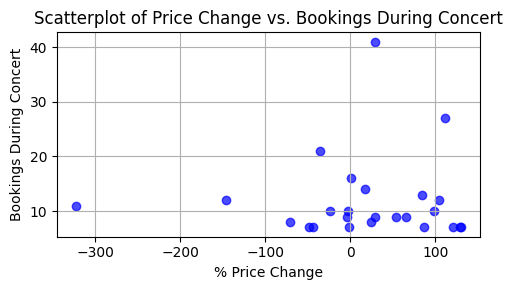



This dataset includes different price increases per id and can be used to find an average increase depending on different features that a host has



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,price_baseline,price_concert,percent_price_change
0,18976122,Rental unit in Los Angeles · 1 bedroom · 1 bed...,39301661,Luna,City of Los Angeles,Fairfax,34.08211,-118.35774,Private room,60,...,0,NaT,NaN,1,0,0,NaN,421.918919,725.5,71.952469
1,18976122,Rental unit in Los Angeles · 1 bedroom · 1 bed...,39301661,Luna,City of Los Angeles,Fairfax,34.08211,-118.35774,Private room,60,...,0,NaT,NaN,1,0,0,NaN,421.918919,75.0,-82.224073


In [318]:
# Sample data from poplar_merged2 DataFrame
price_increase = poplar_merged2['price_change']
bookings_during_concert = poplar_merged2['bookings_during_concert']

# Create a scatterplot
plt.figure(figsize=(5, 3))
plt.scatter(price_increase, bookings_during_concert, c='blue', alpha=0.7)
plt.title('Scatterplot of Price Change vs. Bookings During Concert')
plt.xlabel('% Price Change')
plt.ylabel('Bookings During Concert')


plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Group the datasets based on 'neighbourhood'
baseline_grouped = baseline_listings.groupby(['neighbourhood'])['price'].mean()
concert_grouped = concert_listings.groupby(['neighbourhood','room_type'])['price'].mean()

# Merge the baseline and concert listings based on 'neighbourhood'
merged_df = pd.merge(baseline_grouped, concert_grouped, on=['neighbourhood'], suffixes=('_baseline', '_concert'))

# Calculate the percentage price change
merged_df['percent_price_change'] = ((merged_df['price_concert'] - merged_df['price_baseline']) / merged_df['price_baseline']) * 100


# Now merge this dataset with the original dataset to get the rest of attributes and see which variable explains more an increase in price
merged_df_final = pd.merge(la_listings, merged_df, on=['neighbourhood'])
print('\n\nThis dataset includes different price increases per id and can be used to find an average increase depending on different features that a host has\n')
merged_df_final.head(2)


## Considerations:
* While this study main goal was to quantify the impact of TS on a given city, we must consider that the percentage we found might be different under new circumstances.
* Therefore, this study main contribution is that it is possible to quantify her impact, however, the formula should be recalculated for different environments or time periods.

## Satisfaction with the answer:
* While taking the perspective of an airbnb host is not a complete answer on the overall impact TS has on the economy, it does explain how an individual might benefit from it
* This study shows that on average home owners can increase the lsiting price by 16% when TS makes a concert in LA
* The same study can be replicated for other cities and hosts can thus quantify how much they can benefit from her presence


## Possible ways to continue the study:
* **Transportation trends**: Analysing transportation trends could be also relevant to understand more about the trends and how different players could benefit from her impact in the economy.
* **Cities**: Comparing results across different cities and seeing what makes the possible price increase more.
  * This can be useful if a host has apartments in different cities for example, and they want to find the optimal price increase for each  
* **Restaurants**: Restaurant data could be added to understand more the patterns of fans. One idea could be to scrape data to find restaurant reviews during specific dates. However, given the limited amount of data for this, new approaches for data collection are required.

## Limitations:
* The main limitation for this study was data availability

* I initially started the study with the Philadelphia concert. Here, I collected the data for the SEPTA and I observerd that indeed during her stay there were more people using transportation.
  * However, after extensive reaserch I realised that there is no open data or enough online information to drive results in relation to prices or even apartment locations
  * Therefore, I decided to re-focus my study on LA, where I took the perspective of an airbnb host
  * In the airbnb data we have more flexibility to understand how an individual could benefit from TS presence

* I also tried the `Places API`: With this API it is possible to get data from reviews using the information collected from google maps; however, none of the results were significant enough to understand TS impact

* Location: Finally, in some of the cities (such as Philadelphia) where TS performed we do not have any Airbnb data available. This might be a limitation for comparison across cities.

